# **Common Codes**

In [ ]:
# Connect the colab notebook with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from scipy.stats import loguniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV



In [ ]:
dataset =  pd.read_csv("/content/drive/MyDrive/Customer_Churn/Cleaned_data_24_10_22.csv")

In [ ]:
dataset.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = dataset[['Geography', 'Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','Exited']].copy()


In [ ]:
df.head(5)

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,0,0,42,2,0.00,1,1,1,1
1,2,0,41,1,83807.86,1,0,1,0
2,0,0,42,8,159660.80,3,1,0,1
3,0,0,39,1,0.00,2,0,0,0
4,2,0,43,2,125510.82,1,1,1,0


In [ ]:
df.shape

(15682, 9)

In [ ]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
model = LogisticRegression()

In [ ]:
# define evaluation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

# **Repeatable 50:50**

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.50, random_state=1)

In [ ]:
# define search
lr_model1 = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=10, random_state=1)
# execute search
result1 = lr_model1.fit(X_train1,y_train1)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2360 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
530 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Sol

In [ ]:
# summarize result
print('Best Score: %s' % result1.best_score_)
print('Best Hyperparameters: %s' % result1.best_params_)

Best Score: 0.7774549915507605
Best Hyperparameters: {'C': 0.0018690566937453142, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
# Predict values using the training data
lr_cv_predict_train1 = lr_model1.predict(X_train1)

print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train1, lr_cv_predict_train1)))
print()

Accuracy against training data: 0.7781



In [ ]:
# Predict values using the test data
lr_cv_predict_test1 = lr_model1.predict(X_test1)

print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test1, lr_cv_predict_test1)))
print()

Accuracy against test data: 0.7777



In [ ]:
# View the Confusion Matrix to evaluate the accuracy of the model against the test data.
#
# Returns an array of the form
#		[[True-negative    False-positive]
#		 [False-negative    True-positive]]
#
# A "perfect" classification would have zero values for False-negative and False-positive.
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test1, lr_cv_predict_test1))
print()

Confusion Matrix
[[2998  902]
 [ 841 3100]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test1, lr_cv_predict_test1))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      3900
           1       0.77      0.79      0.78      3941

    accuracy                           0.78      7841
   macro avg       0.78      0.78      0.78      7841
weighted avg       0.78      0.78      0.78      7841




# **Repeatable 80:20**

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
# define search
lr_model2 = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=10, random_state=1)
# execute search
result2 = lr_model2.fit(X_train2,y_train2)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2360 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
530 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Sol

In [ ]:
# summarize result
print('Best Score: %s' % result2.best_score_)
print('Best Hyperparameters: %s' % result2.best_params_)

Best Score: 0.7794346060733145
Best Hyperparameters: {'C': 0.0013651590557519058, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
# Predict values using the training data
lr_cv_predict_train2 = lr_model2.predict(X_train2)

print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train2, lr_cv_predict_train2)))
print()

Accuracy against training data: 0.7794



In [ ]:
# Predict values using the test data
lr_cv_predict_test2 = lr_model2.predict(X_test2)

print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test2, lr_cv_predict_test2)))
print()

Accuracy against test data: 0.7737



In [ ]:
# View the Confusion Matrix to evaluate the accuracy of the model against the test data.
#
# Returns an array of the form
#		[[True-negative    False-positive]
#		 [False-negative    True-positive]]
#
# A "perfect" classification would have zero values for False-negative and False-positive.
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test2, lr_cv_predict_test2))
print()

Confusion Matrix
[[1205  356]
 [ 354 1222]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test2, lr_cv_predict_test2))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1561
           1       0.77      0.78      0.77      1576

    accuracy                           0.77      3137
   macro avg       0.77      0.77      0.77      3137
weighted avg       0.77      0.77      0.77      3137




# **Stratifed 50:50**

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.50, random_state=1,stratify=y)

In [ ]:
# define search
lr_model3 = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=10, random_state=1)
# execute search
result3 = lr_model3.fit(X_train3,y_train3)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2360 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
530 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Sol

In [ ]:
# summarize result
print('Best Score: %s' % result3.best_score_)
print('Best Hyperparameters: %s' % result3.best_params_)

Best Score: 0.7705685363317302
Best Hyperparameters: {'C': 0.0034145313092409694, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Predict values using the training data
lr_cv_predict_train3 = lr_model3.predict(X_train3)

print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train3, lr_cv_predict_train3)))
print()

Accuracy against training data: 0.7716



In [ ]:
# Predict values using the test data
lr_cv_predict_test3 = lr_model3.predict(X_test3)

print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test3, lr_cv_predict_test3)))
print()

Accuracy against test data: 0.7847



In [ ]:
# View the Confusion Matrix to evaluate the accuracy of the model against the test data.
#
# Returns an array of the form
#		[[True-negative    False-positive]
#		 [False-negative    True-positive]]
#
# A "perfect" classification would have zero values for False-negative and False-positive.
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test3, lr_cv_predict_test3))
print()

Confusion Matrix
[[3042  878]
 [ 810 3111]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test3, lr_cv_predict_test3))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      3920
           1       0.78      0.79      0.79      3921

    accuracy                           0.78      7841
   macro avg       0.78      0.78      0.78      7841
weighted avg       0.78      0.78      0.78      7841




# **Stratified 80:20**

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.20, random_state=1,stratify=y)

In [ ]:
# define search
lr_model4 = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=10, random_state=1)
# execute search
result4 = lr_model4.fit(X_train4,y_train4)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2360 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
530 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Sol

In [ ]:
# summarize result
print('Best Score: %s' % result4.best_score_)
print('Best Hyperparameters: %s' % result4.best_params_)

Best Score: 0.7766456343684275
Best Hyperparameters: {'C': 0.02554201841821557, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# Predict values using the training data
lr_cv_predict_train4 = lr_model4.predict(X_train4)

print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train4, lr_cv_predict_train4)))
print()

Accuracy against training data: 0.7770



In [ ]:
# Predict values using the test data
lr_cv_predict_test4 = lr_model4.predict(X_test4)

print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test4, lr_cv_predict_test4)))
print()

Accuracy against test data: 0.7839



In [ ]:
# View the Confusion Matrix to evaluate the accuracy of the model against the test data.
#
# Returns an array of the form
#		[[True-negative    False-positive]
#		 [False-negative    True-positive]]
#
# A "perfect" classification would have zero values for False-negative and False-positive.
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test4, lr_cv_predict_test4))
print()

Confusion Matrix
[[1204  364]
 [ 314 1255]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test4, lr_cv_predict_test4))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1568
           1       0.78      0.80      0.79      1569

    accuracy                           0.78      3137
   macro avg       0.78      0.78      0.78      3137
weighted avg       0.78      0.78      0.78      3137




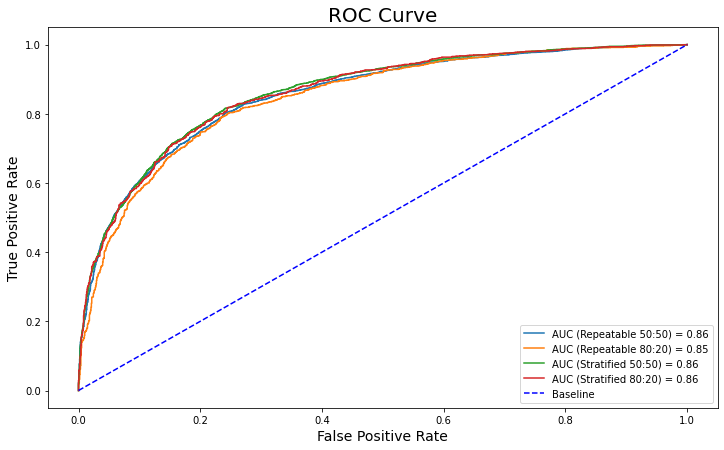

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

probs_m1 = lr_model1.predict_proba(X_test1)[:, 1]
probs_m2 = lr_model2.predict_proba(X_test2)[:, 1]
probs_m3 = lr_model3.predict_proba(X_test3)[:, 1]
probs_m4 = lr_model4.predict_proba(X_test4)[:, 1]


# y_test_int = y_test.replace({'Exited': 1, 'Not Exited': 0})
auc_mod1 = roc_auc_score(y_test1, probs_m1)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test1, probs_m1)

auc_mod2 = roc_auc_score(y_test2, probs_m2)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test2, probs_m2)

auc_mod3 = roc_auc_score(y_test3, probs_m3)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test3, probs_m3)

auc_mod4 = roc_auc_score(y_test4, probs_m4)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test4, probs_m4)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Repeatable 50:50) = {auc_mod1:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Repeatable 80:20) = {auc_mod2:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Stratified 50:50) = {auc_mod3:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (Stratified 80:20) = {auc_mod4:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();